# Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cirrhosis = pd.read_csv('cirrhosis.csv')

In [2]:
# extra code – code to save the figures as high-res PNGs
import os
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#  Data Information

In [3]:
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
# print the number of rows and columns
print("Number of Rows: ", cirrhosis.shape[0])
print("Number of Columns: ", cirrhosis.shape[1])

Number of Rows:  418
Number of Columns:  20


In [7]:
cirrhosis.describe().T.style.background_gradient(cmap = 'YlGnBu')

,count,mean,std,min,25%,50%,75%,max
ID,418.000000,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000


In [8]:
cirrhosis.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [9]:
cirrhosis.isnull().sum().sum()

1033

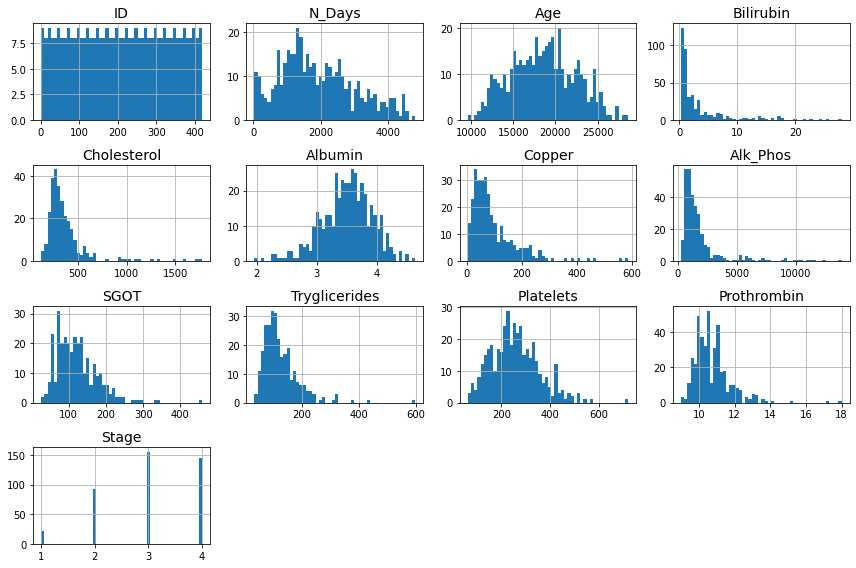

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cirrhosis.hist(bins=50, figsize=(12, 8))
save_fig("Attribute_histogram_plots")  # extra code
plt.show()

In [11]:
# six stages are missing -> drop those row
cirrhosis.dropna(subset = ["Stage"], inplace = True)

In [12]:
# Feature Engineering
# convert age to years from days
cirrhosis["Age"] = cirrhosis["Age"]/365

In [13]:
cirrhosis.isnull().sum().sum()

973

In [14]:
cirrhosis.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [15]:
# look at the possible values in categorical columns
for col in cirrhosis.columns:
  if(cirrhosis[col].dtype=="O"):
    print(col,": ",cirrhosis[col].unique())

Status :  ['D' 'C' 'CL']
Drug :  ['D-penicillamine' 'Placebo' nan]
Sex :  ['F' 'M']
Ascites :  ['Y' 'N' nan]
Hepatomegaly :  ['Y' 'N' nan]
Spiders :  ['Y' 'N' nan]
Edema :  ['Y' 'N' 'S']


In [16]:
print(cirrhosis['Sex'].value_counts())
print(cirrhosis['Ascites'].value_counts())
print(cirrhosis['Spiders'].value_counts())
print(cirrhosis['Hepatomegaly'].value_counts())
print(cirrhosis['Edema'].value_counts())

F    368
M     44
Name: Sex, dtype: int64
N    288
Y     24
Name: Ascites, dtype: int64
N    222
Y     90
Name: Spiders, dtype: int64
Y    160
N    152
Name: Hepatomegaly, dtype: int64
N    348
S     44
Y     20
Name: Edema, dtype: int64


# Target Class Analysis

In [17]:
#checking the distribution of Target Variable
print(cirrhosis['Stage'].value_counts())

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64


In [18]:
#Due to class imbalance issue, we want 3 target values instead of 4 
# Modify the target labels
cirrhosis['Stage'] = cirrhosis['Stage'].replace(2, 1)
cirrhosis['Stage'] = cirrhosis['Stage'].replace(3, 2)
cirrhosis['Stage'] = cirrhosis['Stage'].replace(4, 3)

In [19]:
#checking the distribution of Target Variable
#1 means fatty, 2 means fibrosis & 3 means cirrhosis
print(cirrhosis['Stage'].value_counts())

2.0    155
3.0    144
1.0    113
Name: Stage, dtype: int64


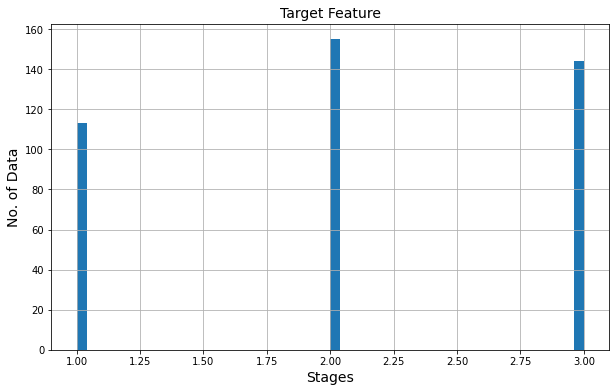

In [20]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cirrhosis['Stage'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Stages')  # Add x-label
plt.ylabel('No. of Data')  # Add y-label
plt.title('Target Feature')  # Add a title
plt.show()

# Spliting Independent And Dependent features

In [21]:
X=cirrhosis.drop('Stage',axis=1)
y=cirrhosis['Stage']

In [22]:
X

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,400,D,D-penicillamine,58.805479,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,2,4500,C,D-penicillamine,56.484932,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,3,1012,D,D-penicillamine,70.120548,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,4,1925,D,D-penicillamine,54.778082,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,5,1504,CL,Placebo,38.131507,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.046575,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9
414,415,1103,C,NaN,39.027397,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2
415,416,1055,C,NaN,57.038356,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9
416,417,691,C,NaN,58.041096,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4


In [23]:
y

0      3.0
1      2.0
2      3.0
3      3.0
4      2.0
      ... 
413    2.0
414    3.0
415    2.0
416    2.0
417    3.0
Name: Stage, Length: 412, dtype: float64

# Feature Selection

## Looking for Correlation

In [24]:
corr_matrix = X.corr()


In [25]:
corr_matrix

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
ID,1.000000,-0.361034,0.028863,-0.061492,0.032897,-0.125524,-0.098663,-0.352856,-0.012097,-0.034100,-0.089686,-0.192291
N_Days,-0.361034,1.000000,-0.135844,-0.400692,-0.138236,0.438433,-0.364809,0.149269,-0.225492,-0.153000,0.169242,-0.109935
Age,0.028863,-0.135844,1.000000,0.006288,-0.157620,-0.182836,0.061549,-0.047247,-0.149869,0.022065,-0.158195,0.115933
Bilirubin,-0.061492,-0.400692,0.006288,1.000000,0.397129,-0.318619,0.456918,0.116984,0.441730,0.436748,-0.024845,0.313184
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811
Albumin,-0.125524,0.438433,-0.182836,-0.318619,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.167703,-0.207897
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122


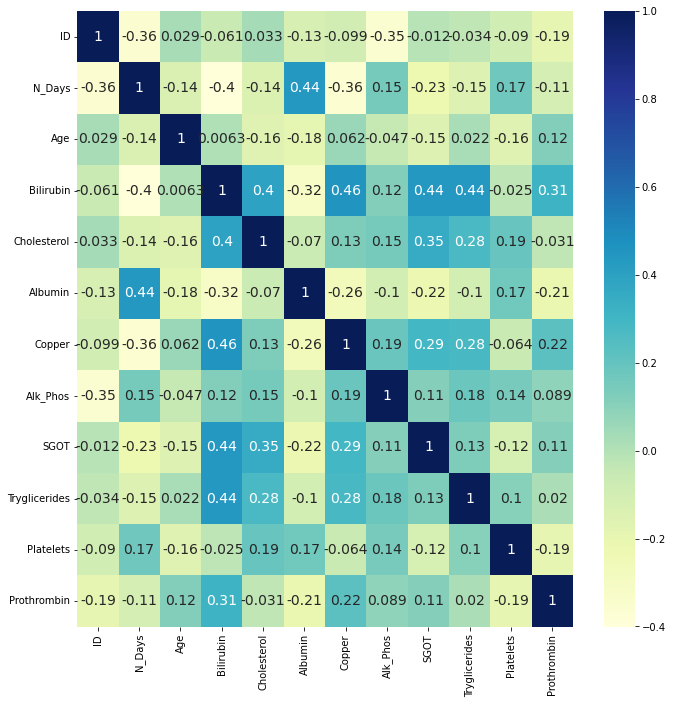

In [26]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
save_fig('correlation')
plt.show()

# Important Feature Extraction

# Stratified Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [27]:
X_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
223,224,1945,C,D-penicillamine,38.646575,F,N,N,N,N,1.0,309.0,3.66,67.0,1214.0,158.10,101.0,309.0,9.7
239,240,1831,C,D-penicillamine,56.117808,F,N,N,N,N,0.4,232.0,3.72,24.0,369.0,51.15,139.0,326.0,10.1
386,387,1653,C,NaN,49.032877,F,NaN,NaN,NaN,S,13.6,NaN,3.00,NaN,NaN,NaN,NaN,233.0,9.9
359,360,778,D,NaN,64.043836,F,NaN,NaN,NaN,N,1.8,NaN,3.15,NaN,NaN,NaN,NaN,183.0,10.4
272,273,1558,C,Placebo,47.452055,F,N,N,Y,N,2.2,328.0,3.46,75.0,1677.0,87.00,116.0,202.0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,3222,D,D-penicillamine,68.556164,F,Y,Y,N,N,2.1,NaN,3.90,50.0,1087.0,103.85,NaN,137.0,10.6
382,383,1022,CL,NaN,37.024658,F,NaN,NaN,NaN,S,0.8,NaN,3.00,NaN,NaN,NaN,NaN,76.0,10.8
213,214,1786,D,Placebo,69.394521,F,N,Y,N,N,0.9,404.0,3.43,34.0,1866.0,79.05,224.0,236.0,9.9
412,413,989,C,NaN,35.024658,F,NaN,NaN,NaN,N,0.7,NaN,3.23,NaN,NaN,NaN,NaN,312.0,10.8


In [28]:
X_train.isnull().sum()

ID                0
N_Days            0
Status            0
Drug             71
Age               0
Sex               0
Ascites          71
Hepatomegaly     71
Spiders          71
Edema             0
Bilirubin         0
Cholesterol      97
Albumin           0
Copper           73
Alk_Phos         71
SGOT             71
Tryglicerides    98
Platelets         7
Prothrombin       1
dtype: int64

# Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

Objectives:

1. Drop the "ID" Column
2. Use simple imputer to impute with strategy = median
3. MinMax Scaler on numeric attributes
4. OneHot encoding on "Drug", "Status", "Edema"
5. Ordial encoding on "Sex", "Ascites", "Spiders", "Hepatomegaly"

In [30]:
cirrhosis.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [31]:
#first half pipeline
f_half_pipeline = ColumnTransformer([
    ("dropID", "drop", ['ID']),
    ("ordinal", OrdinalEncoder(),['Sex','Ascites','Spiders','Hepatomegaly','Edema']),
    ("imputer_Ordinal", SimpleImputer(strategy = 'most_frequent'), ['Drug']),
    ("mms", MinMaxScaler(), ['N_Days', 'Age','Cholesterol','Bilirubin','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin']),
    ("donottouch", 'passthrough', ['Status']),
    
])

In [32]:
f_half_pipeline

ColumnTransformer(transformers=[('dropID', 'drop', ['ID']),
                                ('ordinal', OrdinalEncoder(),
                                 ['Sex', 'Ascites', 'Spiders', 'Hepatomegaly',
                                  'Edema']),
                                ('imputer_Ordinal',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Drug']),
                                ('mms', MinMaxScaler(),
                                 ['N_Days', 'Age', 'Cholesterol', 'Bilirubin',
                                  'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
                                  'Tryglicerides', 'Platelets',
                                  'Prothrombin']),
                                ('donottouch', 'passthrough', ['Status'])])

In [33]:
train_set = f_half_pipeline.fit_transform(X_train)
test_set = f_half_pipeline.transform(X_test)

In [34]:
train_set

array([[0.0, 0.0, 0.0, ..., 0.4930139720558882, 0.08641975308641969, 'C'],
       [0.0, 0.0, 0.0, ..., 0.5269461077844311, 0.1358024691358024, 'C'],
       [0.0, nan, nan, ..., 0.34131736526946105, 0.11111111111111116,
        'C'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.34730538922155685, 0.11111111111111116,
        'D'],
       [0.0, nan, nan, ..., 0.49900199600798395, 0.22222222222222232,
        'C'],
       [0.0, nan, nan, ..., 0.3273453093812375, 0.18518518518518512, 'C']],
      dtype=object)

In [35]:
test_set

array([[0.0, 0.0, 0.0, ..., 0.6207584830339321, 0.24691358024691357, 'D'],
       [0.0, 0.0, 0.0, ..., 0.3373253493013972, 0.06172839506172845, 'C'],
       [0.0, 0.0, 0.0, ..., 0.49900199600798395, 0.14814814814814792,
        'C'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.5868263473053892, 0.09876543209876543, 'C'],
       [0.0, nan, nan, ..., 0.07984031936127745, 0.22222222222222232,
        'D'],
       [1.0, nan, nan, ..., 0.4590818363273453, 0.14814814814814792, 'D']],
      dtype=object)

In [36]:
df2 = pd.DataFrame(train_set)
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,D-penicillamine,0.421705,0.244734,0.114199,0.025271,0.634328,0.113718,0.068148,0.305755,0.120354,0.493014,0.08642,C
1,0.0,0.0,0.0,0.0,0.0,D-penicillamine,0.396456,0.590934,0.067674,0.00361,0.656716,0.036101,0.005894,0.057554,0.187611,0.526946,0.135802,C
2,0.0,NaN,NaN,NaN,1.0,D-penicillamine,0.357032,0.450543,NaN,0.480144,0.38806,NaN,NaN,NaN,NaN,0.341317,0.111111,C
3,0.0,NaN,NaN,NaN,0.0,D-penicillamine,0.163234,0.747991,NaN,0.054152,0.44403,NaN,NaN,NaN,NaN,0.241517,0.17284,D
4,0.0,0.0,1.0,0.0,0.0,Placebo,0.335991,0.419218,0.12568,0.068592,0.559701,0.128159,0.102259,0.140752,0.146903,0.279441,0.074074,C


In [37]:
#renaming
train_df = pd.DataFrame(train_set, columns = ['Sex','Ascites','Spiders','Hepatomegaly','Edema','Drug','N_Days', 'Age','Cholesterol','Bilirubin','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin','Status'])
test_df = pd.DataFrame(test_set, columns = ['Sex','Ascites','Spiders','Hepatomegaly','Edema','Drug','N_Days', 'Age','Cholesterol','Bilirubin','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin','Status'])

In [38]:
train_df['Drug'].value_counts()

D-penicillamine    201
Placebo            128
Name: Drug, dtype: int64

In [39]:
train_df['Status'].value_counts()

C     184
D     123
CL     22
Name: Status, dtype: int64

In [40]:
s_half_pipeline = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), ['Drug','Status']),
    ("imputer_Numeric", SimpleImputer(strategy = 'mean'), ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']),
    ("imputer_Ordinal", SimpleImputer(strategy = 'most_frequent'), ['Ascites','Spiders','Hepatomegaly']),
    ("donottouch", 'passthrough', ['Sex','Edema','N_Days','Age','Bilirubin','Albumin']),
])

In [41]:
s_half_pipeline

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Drug', 'Status']),
                                ('imputer_Numeric', SimpleImputer(),
                                 ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT',
                                  'Tryglicerides', 'Platelets',
                                  'Prothrombin']),
                                ('imputer_Ordinal',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Ascites', 'Spiders', 'Hepatomegaly']),
                                ('donottouch', 'passthrough',
                                 ['Sex', 'Edema', 'N_Days', 'Age', 'Bilirubin',
                                  'Albumin'])])

In [42]:
train_set = s_half_pipeline.fit_transform(train_df)
test_set = s_half_pipeline.transform(test_df)

In [43]:
train_set

array([[1.0, 0.0, 1.0, ..., 0.24473398479913133, 0.02527075812274368,
        0.6343283582089553],
       [1.0, 0.0, 1.0, ..., 0.5909337676438653, 0.0036101083032490985,
        0.656716417910448],
       [1.0, 0.0, 1.0, ..., 0.45054288816503796, 0.48014440433212996,
        0.38805970149253743],
       ...,
       [0.0, 1.0, 0.0, ..., 0.8540173724212812, 0.021660649819494587,
        0.5485074626865672],
       [1.0, 0.0, 1.0, ..., 0.17296416938110737, 0.014440433212996389,
        0.47388059701492546],
       [1.0, 0.0, 1.0, ..., 0.3514115092290988, 0.0036101083032490985,
        0.6902985074626867]], dtype=object)

In [44]:
df2 = pd.DataFrame(train_set)
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,1.0,0.0,0.0,0.114199,0.113718,0.068148,0.305755,0.120354,...,0.08642,0.0,0.0,0.0,0.0,0.0,0.421705,0.244734,0.025271,0.634328
1,1.0,0.0,1.0,0.0,0.0,0.067674,0.036101,0.005894,0.057554,0.187611,...,0.135802,0.0,0.0,0.0,0.0,0.0,0.396456,0.590934,0.00361,0.656716
2,1.0,0.0,1.0,0.0,0.0,0.151568,0.163879,0.125903,0.222271,0.163621,...,0.111111,0.0,0.0,1.0,0.0,1.0,0.357032,0.450543,0.480144,0.38806
3,1.0,0.0,0.0,0.0,1.0,0.151568,0.163879,0.125903,0.222271,0.163621,...,0.17284,0.0,0.0,1.0,0.0,0.0,0.163234,0.747991,0.054152,0.44403
4,0.0,1.0,1.0,0.0,0.0,0.12568,0.128159,0.102259,0.140752,0.146903,...,0.074074,0.0,1.0,0.0,0.0,0.0,0.335991,0.419218,0.068592,0.559701


In [45]:
#null values column created by Drug Null entries
df2[2].value_counts()

1.0    184
0.0    145
Name: 2, dtype: int64

In [46]:
#renaming
train_df = pd.DataFrame(train_set, columns = ['D-penicillamine','Placebo','Censored','Censored_liver','Death','Ascites','Spiders','Hepatomegaly','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Sex','Edema','N_Days','Age','Bilirubin','Albumin'])
test_df = pd.DataFrame(test_set, columns = ['D-penicillamine','Placebo','Censored','Censored_liver','Death','Ascites','Spiders','Hepatomegaly','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Sex','Edema','N_Days','Age','Bilirubin','Albumin'])

In [47]:
train_df

,D-penicillamine,Placebo,Censored,Censored_liver,Death,Ascites,Spiders,Hepatomegaly,Cholesterol,Copper,...,SGOT,Tryglicerides,Platelets,Prothrombin,Sex,Edema,N_Days,Age,Bilirubin,Albumin
0,1.0,0.0,1.0,0.0,0.0,0.114199,0.113718,0.068148,0.305755,0.120354,...,0.08642,0.0,0.0,0.0,0.0,0.0,0.421705,0.244734,0.025271,0.634328
1,1.0,0.0,1.0,0.0,0.0,0.067674,0.036101,0.005894,0.057554,0.187611,...,0.135802,0.0,0.0,0.0,0.0,0.0,0.396456,0.590934,0.00361,0.656716
2,1.0,0.0,1.0,0.0,0.0,0.151568,0.163879,0.125903,0.222271,0.163621,...,0.111111,0.0,0.0,1.0,0.0,1.0,0.357032,0.450543,0.480144,0.38806
3,1.0,0.0,0.0,0.0,1.0,0.151568,0.163879,0.125903,0.222271,0.163621,...,0.17284,0.0,0.0,1.0,0.0,0.0,0.163234,0.747991,0.054152,0.44403
4,0.0,1.0,1.0,0.0,0.0,0.12568,0.128159,0.102259,0.140752,0.146903,...,0.074074,0.0,1.0,0.0,0.0,0.0,0.335991,0.419218,0.068592,0.559701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1.0,0.0,0.0,0.0,1.0,0.151568,0.083032,0.058791,0.179856,0.163621,...,0.197531,1.0,0.0,1.0,0.0,0.0,0.70454,0.837405,0.064982,0.723881
325,1.0,0.0,0.0,1.0,0.0,0.151568,0.163879,0.125903,0.222271,0.163621,...,0.222222,0.0,0.0,1.0,0.0,1.0,0.217276,0.212595,0.018051,0.38806
326,0.0,1.0,0.0,0.0,1.0,0.171601,0.054152,0.116183,0.122302,0.338053,...,0.111111,0.0,0.0,1.0,0.0,0.0,0.386489,0.854017,0.021661,0.548507
327,1.0,0.0,1.0,0.0,0.0,0.151568,0.163879,0.125903,0.222271,0.163621,...,0.222222,0.0,0.0,1.0,0.0,0.0,0.209967,0.172964,0.01444,0.473881


In [48]:
X_train = train_df

In [49]:
X_test = test_df

In [50]:
#every column consist of object type variable -> to solve this run the below code
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   D-penicillamine  329 non-null    object
 1   Placebo          329 non-null    object
 2   Censored         329 non-null    object
 3   Censored_liver   329 non-null    object
 4   Death            329 non-null    object
 5   Ascites          329 non-null    object
 6   Spiders          329 non-null    object
 7   Hepatomegaly     329 non-null    object
 8   Cholesterol      329 non-null    object
 9   Copper           329 non-null    object
 10  Alk_Phos         329 non-null    object
 11  SGOT             329 non-null    object
 12  Tryglicerides    329 non-null    object
 13  Platelets        329 non-null    object
 14  Prothrombin      329 non-null    object
 15  Sex              329 non-null    object
 16  Edema            329 non-null    object
 17  N_Days           329 non-null    ob

In [51]:
#object type to float type

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [52]:
X_train.describe().T.style.background_gradient(cmap = 'BuGn')

,count,mean,std,min,25%,50%,75%,max
D-penicillamine,329.000000,0.610942,0.488279,0.000000,0.000000,1.000000,1.000000,1.000000
Placebo,329.000000,0.389058,0.488279,0.000000,0.000000,0.000000,1.000000,1.000000
Censored,329.000000,0.559271,0.497231,0.000000,0.000000,1.000000,1.000000,1.000000
Censored_liver,329.000000,0.066869,0.250176,0.000000,0.000000,0.000000,0.000000,1.000000
Death,329.000000,0.373860,0.484564,0.000000,0.000000,0.000000,1.000000,1.000000
Ascites,329.000000,0.151568,0.120528,0.000000,0.090030,0.151568,0.151568,1.000000
Spiders,329.000000,0.163879,0.130952,0.000000,0.083032,0.162455,0.176895,1.000000
Hepatomegaly,329.000000,0.125903,0.142528,0.000000,0.052603,0.098059,0.125903,1.000000
Cholesterol,329.000000,0.222271,0.117880,0.000000,0.140752,0.222271,0.258993,1.000000
Copper,329.000000,0.163621,0.100661,0.000000,0.107965,0.163621,0.171681,1.000000


# Model Training

In [52]:
#if not installed

#!pip install xgboost

In [88]:
def plot_classification_report(y_train, y_pred1, y_test, y_pred2, c_name):
    print("-"*25,c_name,"(TRAIN SET)","-"*25)
    print(classification_report(y_train, y_pred1))
    print("-"*25,c_name,"(Test SET)","-"*25)
    print(classification_report(y_test, y_pred2))

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [108]:
zeror = DummyClassifier(strategy='most_frequent')
knn =KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier()
mlp = MLPClassifier(random_state=1,max_iter=100,solver='sgd')
svm = svm.SVC()
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
ada = AdaBoostClassifier()
#xgb = XGBClassifier()
lda = LinearDiscriminantAnalysis()

In [109]:
zeror.fit(X_train, y_train)
knn.fit(X_train, y_train)
gnb.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
logreg.fit(X_train, y_train)
ada.fit(X_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_train, y_train)

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


LinearDiscriminantAnalysis()

In [1]:
y_pred = zeror.predict(X_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

NameError: name 'zeror' is not defined

# Hyperparameter Tuning

In [110]:
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import numpy as np

# K-Nearest Neighbor

In [58]:
k = range(5, 50)
k

range(5, 50)

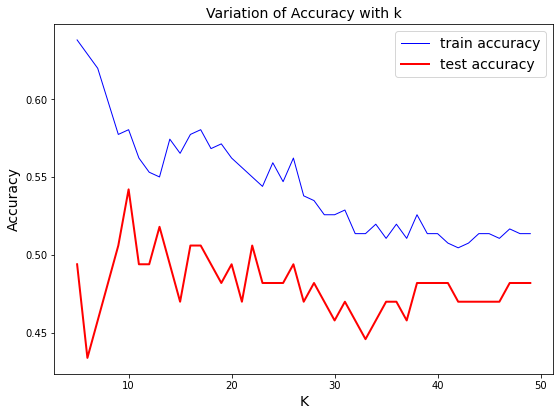

In [59]:
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [60]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,5,0.638298,0.493976
1,6,0.629179,0.433735
2,7,0.620061,0.457831
3,8,0.598784,0.481928
4,9,0.577508,0.506024
5,10,0.580547,0.542169
6,11,0.562310,0.493976
7,12,0.553191,0.493976
8,13,0.550152,0.518072
9,14,0.574468,0.493976


In [112]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]

random_grid = {
    'n_neighbors': [10],  # Range for the number of neighbors
    'weights': ['uniform', 'distance'],  # Possible weight options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm options
    'leaf_size': [int(x) for x in np.linspace(start = 25, stop = 35, num = 5)],  # Range for the leaf size
    'p': [1, 2],  # Values of p (1 for Manhattan distance, 2 for Euclidean distance)
    'metric': ['euclidean', 'manhattan'],  # Distance metric options
}
print(random_grid)

{'n_neighbors': [10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [25, 27, 30, 32, 35], 'p': [1, 2], 'metric': ['euclidean', 'manhattan']}


In [71]:
# Random Search
knn =KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [25, 27, 30, 32, 35],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [10], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [72]:
knn_randomcv.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 10,
 'metric': 'euclidean',
 'leaf_size': 27,
 'algorithm': 'auto'}

In [73]:
knn_randomcv.best_estimator_

KNeighborsClassifier(leaf_size=27, metric='euclidean', n_neighbors=10,
                     weights='distance')

In [118]:
knn=KNeighborsClassifier(leaf_size=27, metric='euclidean', n_neighbors=10,weights='distance')
knn.fit(X_train,y_train)
print('K Nearest Neighbor Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))
print('K Nearest Neighbor Test Accuracy ', accuracy_score(y_test, knn.predict(X_test) ))

K Nearest Neighbor Train Accuracy  1.0
K Nearest Neighbor Test Accuracy  0.4819277108433735


In [115]:
#Grid Search
knn =KNeighborsClassifier()
knn_gridcv=GridSearchCV(estimator=knn,param_grid=random_grid,cv=10,n_jobs=-1,verbose=2)
### fit the randomized model
knn_gridcv.fit(X_train,y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.4s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 27, 30, 32, 35],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.4s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weig

[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.4s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights

[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.4s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=1, weight

[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.4s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=27, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=27, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=27, metric=euclidean, n_neighbors=10, p=1, weigh

In [116]:
knn_gridcv.best_estimator_

KNeighborsClassifier(leaf_size=25, metric='euclidean', n_neighbors=10, p=1,
                     weights='distance')

In [120]:
knn=KNeighborsClassifier(leaf_size=25, metric='euclidean', n_neighbors=10, p=1,weights='distance')
knn.fit(X_train,y_train)
print('K Nearest Neighbor Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))
print('K Nearest Neighbor Test Accuracy ', accuracy_score(y_test, knn.predict(X_test) ))

K Nearest Neighbor Train Accuracy  1.0
K Nearest Neighbor Test Accuracy  0.4819277108433735


In [84]:
#Due to overfitting we choose only n_neighbors=10 as hyperparameter
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('K-Nearest Neighbor Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))
print('K-Nearest Neighbor Test Accuracy ', accuracy_score(y_test, knn.predict(X_test) ))

K-Nearest Neighbor Train Accuracy  0.5805471124620061
K-Nearest Neighbor Test Accuracy  0.5421686746987951


## Classification Matrix

In [89]:
c_name= "K-Nearest Neighbor"
plot_classification_report(y_train, knn.predict(X_train), y_test, knn.predict(X_test), c_name)


------------------------- K-Nearest Neighbor (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.56      0.49      0.52        90
         2.0       0.56      0.53      0.55       124
         3.0       0.61      0.70      0.66       115

    accuracy                           0.58       329
   macro avg       0.58      0.58      0.57       329
weighted avg       0.58      0.58      0.58       329

------------------------- K-Nearest Neighbor (Test SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.57      0.57      0.57        23
         2.0       0.50      0.55      0.52        31
         3.0       0.58      0.52      0.55        29

    accuracy                           0.54        83
   macro avg       0.55      0.54      0.54        83
weighted avg       0.54      0.54      0.54        83



# Naive Bayes

In [99]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Naive Bayes Train Accuracy ', accuracy_score(y_train, gnb.predict(X_train) ))
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, gnb.predict(X_test) ))

K Nearest Neighbor Train Accuracy  0.513677811550152
K Nearest Neighbor Test Accuracy  0.4819277108433735


## Classification Matrix

In [102]:
c_name= "Naive Bayes"
plot_classification_report(y_train, gnb.predict(X_train), y_test, gnb.predict(X_test), c_name)


------------------------- Naive Bayes (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.42      0.73      0.53        90
         2.0       0.48      0.33      0.39       124
         3.0       0.72      0.54      0.62       115

    accuracy                           0.51       329
   macro avg       0.54      0.53      0.51       329
weighted avg       0.55      0.51      0.51       329

------------------------- Naive Bayes (Test SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.36      0.65      0.46        23
         2.0       0.58      0.35      0.44        31
         3.0       0.64      0.48      0.55        29

    accuracy                           0.48        83
   macro avg       0.52      0.50      0.48        83
weighted avg       0.54      0.48      0.48        83



# Random Forest

In [162]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]

random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],  # Range for the number of estimators
    'criterion': ['gini', 'entropy'],  # Criterion options
    'max_depth': [None] + [int(x) for x in np.linspace(start = 3, stop = 20, num = 5)],
    'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)],  # Range for the minimum samples to split a node
    'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 20, num = 5)],  # Range for the minimum samples in a leaf node
}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 7, 11, 15, 20], 'min_samples_split': [2, 6, 11, 15, 20], 'min_samples_leaf': [1, 5, 10, 15, 20]}


In [163]:
# Random Search
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 7, 11, 15, 20],
                                        'min_samples_leaf': [1, 5, 10, 15, 20],
                                        'min_samples_split': [2, 6, 11, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=100, verbose=2)

In [165]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                       n_estimators=10)

In [249]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                       n_estimators=10)
rf.fit(X_train,y_train)
print('K Nearest Neighbor Train Accuracy ', accuracy_score(y_train, rf.predict(X_train) ))
print('K Nearest Neighbor Test Accuracy ', accuracy_score(y_test, rf.predict(X_test) ))

K Nearest Neighbor Train Accuracy  0.7082066869300911
K Nearest Neighbor Test Accuracy  0.5180722891566265


In [87]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [88]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 560,
 'criterion': 'gini'}

In [90]:
rf_randomcv.best_estimator_


RandomForestClassifier(max_depth=560, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600)

In [98]:
rf=RandomForestClassifier(max_depth=560, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600)
rf.fit(X_train,y_train)

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=560, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600)

In [99]:
y_pred = rf_randomcv.predict(X_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))

Random Forest Test Accuracy  0.5421686746987951
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   3.6s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.4s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   0.9s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; 

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   3.4s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.7s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, 

[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   3.6s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.4s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   2.9s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1600; total time=   2.5s
[CV] END criterion=

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   3.4s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.2s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   2.9s
[CV] END criterion=entropy

In [146]:
def plot_classification_report(y_test, y_pred, c_name):
    print("-"*25,c_name," (TRAIN SET)","-"*25)
    print(classification_report(y_test, y_pred))

In [147]:
c_name= "Liner"
plot_classification_report(y_test, y_pred, c_name)




------------------------- Liner  (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.48      0.52      0.50        23
         2.0       0.43      0.48      0.45        31
         3.0       0.70      0.55      0.62        29

    accuracy                           0.52        83
   macro avg       0.53      0.52      0.52        83
weighted avg       0.54      0.52      0.52        83



In [89]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   3.2s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.3s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.2s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=800; total time=   1.3s
[CV] END criterion

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   3.2s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   2.8s
[CV] END criterion=entropy, ma

[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   3.6s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   2.9s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1600; total time=   2.5s
[CV] END criterion=

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   3.2s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.3s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max

In [125]:
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

    # Set the text color and formatting options
    text_color = 'black'
    header_fmt = '{:10s} {:^9s} {:^9s} {:^9s} {:^9s}'
    row_fmt = '{:10s} {:^9.2f} {:^9.2f} {:^9.2f} {:^9d}'  # Updated format code for 'support'

    # Print the classification report header
    print(header_fmt.format('', 'Precision', 'Recall', 'F1-Score', 'Support'))
    print('-' * 52)

    # Print the metrics for each class
    for target_name in target_names:
        metrics = report[str(target_name)]  # Convert target_name to string
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        support = metrics['support']
        print(row_fmt.format(target_name, precision, recall, f1_score, support))

#plot_classification_report(y_true, y_pred, target_names)


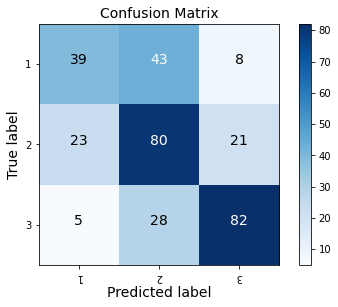

In [468]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# Replace y_true and y_pred with your actual labels

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Add labels to the plot
classes = ['1', '2', '3']  # Replace with your actual class labels
num_classes = len(classes)
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, classes, rotation=180) # for ulta
plt.yticks(tick_marks, classes)

# Add numerical values in the heatmap
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Set plot properties
plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [57]:
cirrhosis['Drug'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [14]:
cirrhosis.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [33]:
# extra code – code to save the figures as high-res PNGs
import os
from pathlib import Path

IMAGES_PATH = Path() / "images" / "Data Preprocessing"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

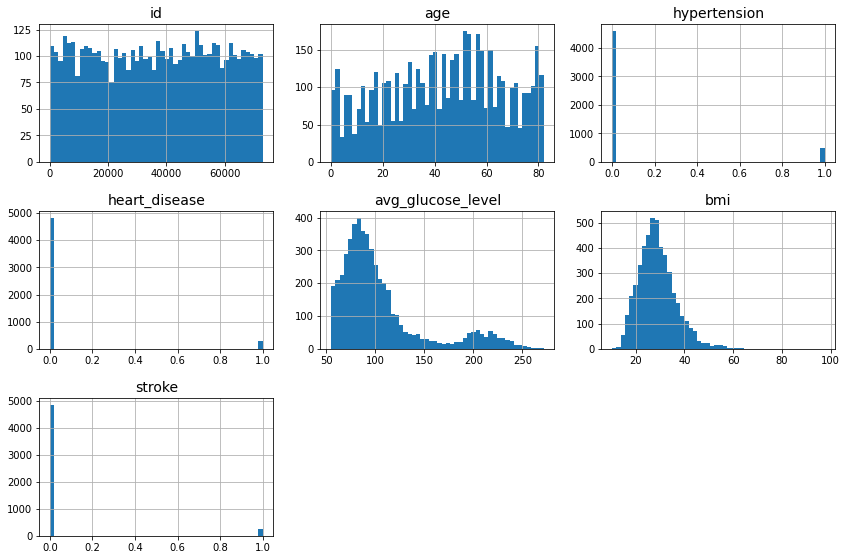

In [58]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cirrhosis.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# Create a Test Set

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cirrhosis, test_size=0.2, random_state=32)

In [10]:
len(train_set)

334

In [9]:
len(test_set)

84

In [11]:
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [14]:
# iloc can be used for data slicing
display(cirrhosis.iloc[[0, 2, 4, 7]])

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0


# Stratified Sampling

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
X = cirrhosis.drop(columns='Stage', axis=1)
Y = cirrhosis['Stage']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state = 42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(334, 19) (334,) (84, 19) (84,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

ValueError: could not convert string to float: 'D'

In [24]:
from sklearn. feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, cirrhosis.columns [0:len(cirrhosis.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

ValueError: Input y contains NaN.

In [ ]:
housing.columns

In [ ]:
# Let us say that median-income has been identified as a very important feature
# hence we want to ensure that the when the dataset has been split, the right 
# number of representation sample has been used 

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [ ]:
housing.head(15)

In [ ]:
housing['income_cat'].value_counts()

In [ ]:
train_set.head()

In [ ]:
train_set["income_cat"] = pd.cut(train_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot_train_set")  # extra code
plt.show()

In [ ]:
test_set["income_cat"] = pd.cut(test_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

test_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot_test_set")  # extra code
plt.show()

In [ ]:
housing['income_cat'].value_counts()

In [ ]:
train_set['income_cat'].value_counts()

In [ ]:
test_set['income_cat'].value_counts()

In [ ]:
# Proportion of Categories

data = [
    [1, housing['income_cat'].value_counts()[4]/len(housing), 
     train_set['income_cat'].value_counts()[4]/len(train_set),
     test_set['income_cat'].value_counts()[4] / len(test_set) ],
    
    [2, housing['income_cat'].value_counts()[1]/len(housing), 
     train_set['income_cat'].value_counts()[1]/len(train_set),
     test_set['income_cat'].value_counts()[1] / len(test_set)],
    
    [3, housing['income_cat'].value_counts()[0]/len(housing), 
     train_set['income_cat'].value_counts()[0]/len(train_set),
     test_set['income_cat'].value_counts()[0] / len(test_set)],
    
    [4, housing['income_cat'].value_counts()[2]/len(housing), 
     train_set['income_cat'].value_counts()[2]/len(train_set),
     test_set['income_cat'].value_counts()[2] / len(test_set)],
    
    [5, housing['income_cat'].value_counts()[3]/len(housing), 
     train_set['income_cat'].value_counts()[3]/len(train_set),
     test_set['income_cat'].value_counts()[3] / len(test_set)]
]

df = pd.DataFrame(data, columns = ['Category', 'Proportion in original dataset', 'Proportion in train set', 'Proportion in test set'])

df

In [ ]:
# Proportion of Category 5

print("Proportion of Category 5 in the entire dataset: ", 2362 / len(housing))
print("Proportion of Category 5 in the train set: ", 1863 / len(train_set))
print("Proportion of Category 5 in the test set: ", 499 / len(test_set))


# How to do Stratified Sampling?

In [ ]:
housing.head()

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify = housing['income_cat'])

In [ ]:
data = [
    [1, housing['income_cat'].value_counts()[4]/len(housing), 
     strat_train_set['income_cat'].value_counts()[4]/len(strat_train_set),
     strat_test_set['income_cat'].value_counts()[4] / len(strat_test_set) ],
    
    [2, housing['income_cat'].value_counts()[1]/len(housing), 
     strat_train_set['income_cat'].value_counts()[1]/len(strat_train_set),
     strat_test_set['income_cat'].value_counts()[1] / len(strat_test_set)],
    
    [3, housing['income_cat'].value_counts()[0]/len(housing), 
     strat_train_set['income_cat'].value_counts()[0]/len(strat_train_set),
     strat_test_set['income_cat'].value_counts()[0] / len(strat_test_set)],
    
    [4, housing['income_cat'].value_counts()[2]/len(housing), 
     strat_train_set['income_cat'].value_counts()[2]/len(strat_train_set),
     strat_test_set['income_cat'].value_counts()[2] / len(strat_test_set)],
    
    [5, housing['income_cat'].value_counts()[3]/len(housing), 
     strat_train_set['income_cat'].value_counts()[3]/len(strat_train_set),
     strat_test_set['income_cat'].value_counts()[3] / len(strat_test_set)]
]

df = pd.DataFrame(data, columns = ['Category', 'Proportion in original dataset', 'Proportion in train set', 'Proportion in test set'])

df

In [ ]:
# Proportion by category in the test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [ ]:
# Proportion by category in the train set
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

In [ ]:
# Proportion by category in the original data set
housing["income_cat"].value_counts() / len(housing)

# Discover and Visualize the Data to Gain Insights

In [ ]:
cirrhosis = strat_train_set.copy()

# Visualizing Geographical Data

In [ ]:
cirrhosis.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

In [ ]:
filename = "california.png"
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

In [30]:

corr_matrix = cirrhosis.corr()

In [31]:
corr_matrix

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.032897,-0.128924,-0.098663,-0.352856,-0.012097,-0.034100,-0.076699,-0.191930,-0.033757
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,0.037136,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899


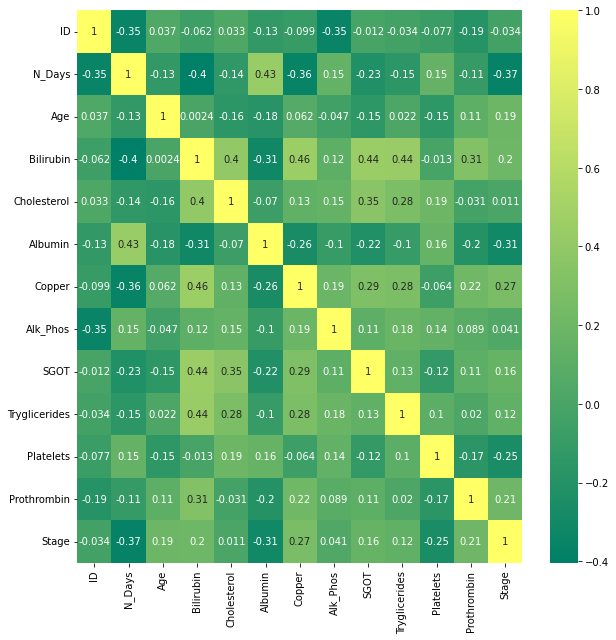

In [36]:
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(corr_matrix, annot = True, cmap = 'summer')
save_fig('correlation')
plt.show()

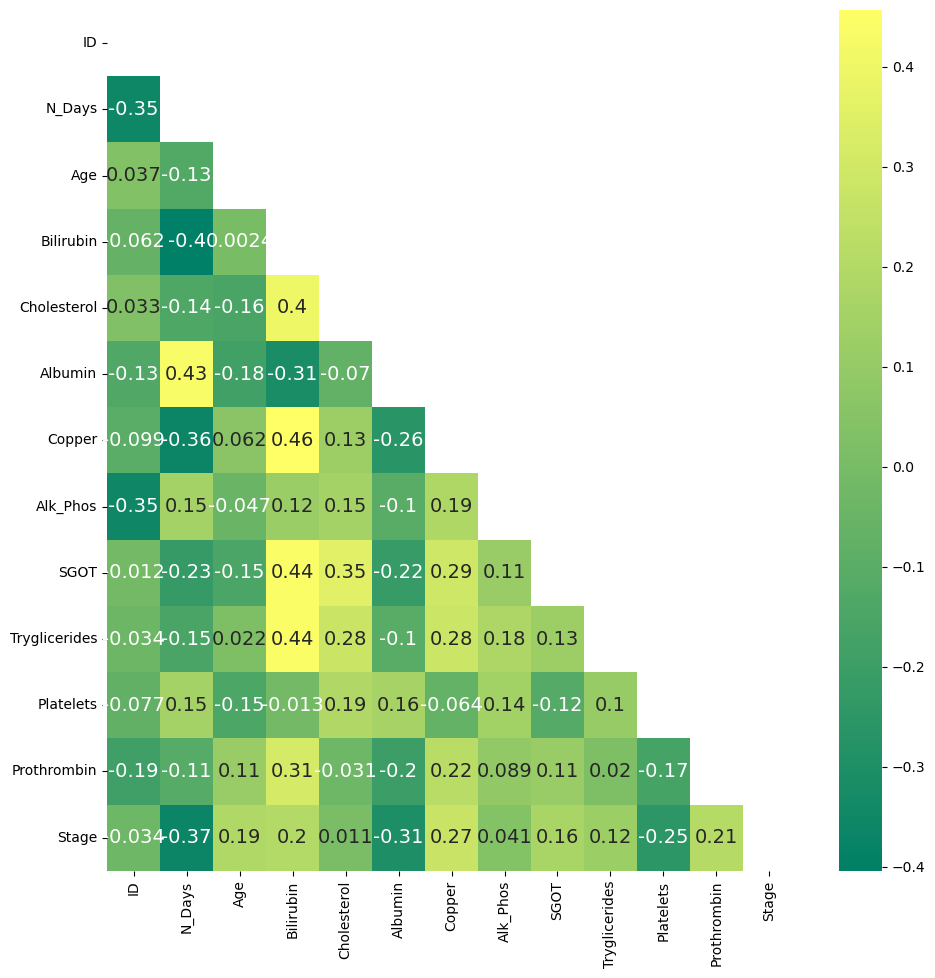

In [21]:
import seaborn as sns
import numpy as np
mask = np.triu(corr_matrix)
#mask = np.tril(corr_matrix)
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'summer', mask = mask)
save_fig('correlation-lower tiangle')
plt.show()

In [22]:
corr_matrix

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.032897,-0.128924,-0.098663,-0.352856,-0.012097,-0.034100,-0.076699,-0.191930,-0.033757
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,0.037136,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899


In [37]:
# Let's say, we are interested in median_house_value
corr_matrix["Stage"]

ID              -0.033757
N_Days          -0.366193
Age              0.189083
Bilirubin        0.200731
Cholesterol      0.011164
Albumin         -0.305296
Copper           0.269400
Alk_Phos         0.041273
SGOT             0.164945
Tryglicerides    0.123899
Platelets       -0.253523
Prothrombin      0.207802
Stage            1.000000
Name: Stage, dtype: float64

In [38]:
# Let's sort it in descending order to identify the attributes that are strongly correlated
corr_matrix["Stage"].sort_values(ascending=False)

Stage            1.000000
Copper           0.269400
Prothrombin      0.207802
Bilirubin        0.200731
Age              0.189083
SGOT             0.164945
Tryglicerides    0.123899
Alk_Phos         0.041273
Cholesterol      0.011164
ID              -0.033757
Platelets       -0.253523
Albumin         -0.305296
N_Days          -0.366193
Name: Stage, dtype: float64

In [39]:
absolute_corr_matrix = abs(corr_matrix)
absolute_corr_matrix["Stage"].sort_values(ascending=False)

Stage            1.000000
N_Days           0.366193
Albumin          0.305296
Copper           0.269400
Platelets        0.253523
Prothrombin      0.207802
Bilirubin        0.200731
Age              0.189083
SGOT             0.164945
Tryglicerides    0.123899
Alk_Phos         0.041273
ID               0.033757
Cholesterol      0.011164
Name: Stage, dtype: float64

In [43]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in cirrhosis.columns:
    le = LabelEncoder()
    cirrhosis[col] = le.fit_transform(cirrhosis[col])
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,29,2,0,267,0,1,1,1,2,83,58,13,112,196,111,105,66,32,3
1,1,394,0,0,249,0,0,1,1,0,8,86,139,45,282,82,37,91,16,2
2,2,87,2,0,333,1,0,0,0,1,11,9,79,131,8,60,7,42,30,3
3,3,216,2,0,223,0,0,1,1,1,15,44,10,52,278,20,41,62,13,3
4,4,167,1,1,52,0,0,1,1,0,31,71,84,105,32,81,21,30,19,2


In [44]:
# fill null values
for col in cirrhosis.columns:
    cirrhosis[col] = cirrhosis[col].fillna(cirrhosis[col].mean)
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,29,2,0,267,0,1,1,1,2,83,58,13,112,196,111,105,66,32,3
1,1,394,0,0,249,0,0,1,1,0,8,86,139,45,282,82,37,91,16,2
2,2,87,2,0,333,1,0,0,0,1,11,9,79,131,8,60,7,42,30,3
3,3,216,2,0,223,0,0,1,1,1,15,44,10,52,278,20,41,62,13,3
4,4,167,1,1,52,0,0,1,1,0,31,71,84,105,32,81,21,30,19,2


In [45]:
cirrhosis.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [49]:
from sklearn.feature_selection import chi2
X = cirrhosis.drop(columns=['Stage'], axis=1)
y = cirrhosis['Stage']

In [52]:

chi_scores = chi2(X, y)

In [53]:
chi_scores


(array([4.60005513e+02, 4.04490186e+03, 5.31939359e+01, 9.79254014e+00,
        1.23924938e+03, 1.43641903e+00, 2.64592496e+01, 2.29419823e+01,
        1.92717416e+01, 4.00994760e+01, 8.31271529e+02, 3.20488872e+02,
        7.94339162e+02, 6.60425082e+02, 6.12848741e+02, 5.26807082e+02,
        2.52948049e+02, 1.16680864e+03, 2.36927822e+02]),
 array([2.98324751e-098, 0.00000000e+000, 7.76148727e-011, 4.40711410e-002,
        4.93451441e-267, 8.37841158e-001, 2.55646829e-005, 1.30050737e-004,
        6.94972378e-004, 4.12815613e-008, 1.29252088e-178, 4.11349012e-068,
        1.29273838e-170, 1.29009703e-141, 2.56640469e-131, 1.06552334e-112,
        1.50817188e-053, 2.49710407e-251, 4.25612011e-050]))

<AxesSubplot:>

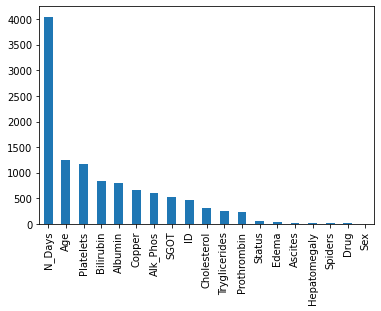

In [54]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

# Experimenting with Attribute Combinations

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]
housing.head(10)

In [ ]:

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# Data Cleaning

In [ ]:
# Null values
housing.isnull().sum()


In [ ]:
print(housing.isnull().sum().sum())

In [ ]:
# total_bedrooms and bedroom_ratio has some missing values
# Fixing Options

# 1. Get rid of the corresponding rows
# 2. Get rid of the whole attribute
# 3. Set the values to some values (e.g. zero, mean, median etc...)

# OPTION 1: housing.dropna(subset = ["total_bedrooms","bedrooms_ratio" ], inplace = True)
# OPTION 2: housing.drop( ["total_bedrooms","bedrooms_ratio" ], axis = 1, inplace = True)
# OPTION 3: housing[["total_bedrooms","bedrooms_ratio"]] = housing[["total_bedrooms","bedrooms_ratio"] ].fillna(housing[["total_bedrooms","bedrooms_ratio"]].median())

In [ ]:
housing.isnull().sum().sum()

In [ ]:
housing.head()

# Handling Text and Categorical Attributes

In [ ]:
housing.head()

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

Two popular kinds of encoding are

    - Ordinal Encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
    
    - One Hot Encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


# Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

One issue with this is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g. for ordered categories such as "bad", "average", "good" and "excellent") but it is obviously not the case for ocean_proximity column.

# One Hot Encoder

To fix this issue, a common solution is to create one binary attribute per category: - a  1 or a 0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
housing_cat_1hot.toarray()

In [ ]:
cat_encoder.categories_

In [ ]:
housing_cat.head(10)

If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country's population and GDP per capita). Alternatively, you could replace each category with a learnable, low dimensional vector called embedding.

# Custom Transformers

In [ ]:
housing.columns

Let us create custom transformers that will add some attributes

  -- rooms per household
    
  -- population per household

  -- bedrooms per room

In [ ]:
housing.head(10)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # do nothing
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if(self.add_bedrooms_per_room):
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attributes = attr_addr.transform(housing.values)
housing_extra_attributes

In [ ]:
housing.columns

In [ ]:
house = pd.DataFrame(housing_extra_attributes, columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house', 'rooms_per_household', 'population_per_household'])

In [ ]:
house.head(10)

In [ ]:
housing.head(10)

BaseEstimator has a base class ---> you will get two extra methods get_params() and set_params()

TransformerMixin allows three methods to be implemented fit(returning self), transform() and fit_transform(). You can get the last one for free

In [ ]:
attr_addr.get_params()

# Feature Scaling

In [ ]:
housing.head()

In [ ]:
housing.dtypes

In [ ]:
numeric_columns = []
for col in housing.columns:
    if housing[col].dtype == 'int64' or housing[col].dtype == 'float64':
        numeric_columns.append(col)

In [ ]:
numeric_columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
housing[numeric_columns] = mms.fit_transform(housing[numeric_columns])


In [ ]:
housing.head()